## Usefule Links:
- Virtual environment and keras: https://www.tutorialspoint.com/keras/keras_installation.htm


In [32]:
#Read all data
import csv
import pandas as pd
dataset=pd.read_csv('OversampledSwipeData.csv',index_col=0)
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,Label
0,0.052478,0.277631,0.451259,0.718039,0.462785,0.0,0.0,0.018702,0.167556,-0.021220,...,-0.000286,0.006156,0.000038,0.098039,0.175416,0.183196,0.083857,0.007032,0.183644,0
1,0.052112,0.329417,0.456423,0.707689,0.431129,0.0,0.0,0.018824,0.188321,-0.046427,...,-0.001681,0.006563,0.000043,0.172549,0.161923,0.174437,0.012390,0.000154,0.172166,0
2,0.044798,0.246703,0.482247,0.682013,0.413386,0.0,0.0,0.023549,0.219466,-0.084152,...,-0.003980,0.007612,0.000058,0.172549,0.165296,0.176905,0.015824,0.000250,0.179818,0
3,0.050101,0.292016,0.470626,0.711022,0.418269,0.0,0.0,0.019350,0.182533,-0.089321,...,0.000438,0.009006,0.000081,0.149020,0.165296,0.178174,0.036672,0.001343,0.183644,0
4,0.048638,0.282665,0.438347,0.712347,0.447676,0.0,0.0,0.023968,0.151995,-0.024688,...,-0.001410,0.007316,0.000054,0.125490,0.175416,0.184353,0.061493,0.003786,0.183644,0


In [33]:
dataset.shape

(25800, 34)

In [34]:
#replace the user ID by class name and count the number of sample in each class
#dataset['Label'] = pd.factorize(dataset['Label'])[0]
dataset.groupby(['Label'])['Label'].count()

Label
0     300
1     300
2     300
3     300
4     300
     ... 
81    300
82    300
83    300
84    300
85    300
Name: Label, Length: 86, dtype: int64

In [35]:
#seperate the profile in two groups: (i) Training profile (0-67) 80.0\%, and (ii) auxiliary profile (68-85) 20.0%
totalUser= len(pd.unique(dataset['Label']))
trainingData = dataset[dataset['Label'] < 68]
auxilaryData = dataset[dataset['Label'] >= 68]
print("Total user in training dataset:", len(pd.unique(trainingData['Label'])))
print("Total user in auxiliary dataset:", len(pd.unique(auxilaryData['Label'])))

Total user in training dataset: 68
Total user in auxiliary dataset: 18


In [36]:
#Prepare the traning data for training and testing the model
import tensorflow
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X=trainingData.drop(columns=['Label'])
y=trainingData['Label']

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.2, random_state=22)
#Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=22)

ytrain = to_categorical(ytrain)
yval = to_categorical(yval)
#ytest = to_categorical(ytest)

In [37]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xval.shape)
print(yval.shape)
#print(Xtest.shape)
#print(ytest.shape)

(16320, 33)
(16320, 68)
(4080, 33)
(4080, 68)


In [38]:
# import all necessary package for a neural network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inlineimport keras
from keras.layers import Dense, Dropout, Input,Activation,Dropout, Flatten
from keras.models import Model,Sequential
from keras.datasets import mnist
#from tqdm import tqdm
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization
from keras.optimizers import Adam
#import torch.nn.functional as F

In [39]:
#define optimizers for neural network
from keras.optimizers import SGD, RMSprop, Adam
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

def RMSprop_optimizer():
    return RMSprop(lr=0.001, rho=0.9)

In [40]:
#neural network architecture for model training

def create_classifier(release=False,totalClass=68):
  classifier = Sequential()
  classifier.add(Dense(128, input_dim=33))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.1))

  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  classifier.add(Dense(256))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.1))

  classifier.add(Dense(512))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.1))

  classifier.add(Dense(256))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.1))

  classifier.add(Dense(128))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.1))

  #if release:
  classifier.add(Dense(totalClass, activation='softmax'))
  #else:
  #   classifier.add(Dense(Tuser))
  #np.log_softmax_v2(a, axis=axis)
  #classifier.add(F.softmax(a, dim=1))

  classifier.compile(loss='categorical_crossentropy', optimizer=RMSprop_optimizer(),metrics=['accuracy'])
  return classifier

Clasf=create_classifier()
Clasf.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 128)               4352      
                                                                 
 batch_normalization_41 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 activation_41 (Activation)  (None, 128)               0         
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 256)               33024     
                                                                 
 batch_normalization_42 (Bat  (None, 256)              1024      
 chNormalization)                                     

c:\Users\mdmor\OneDrive\Documents\GitHub\ModelDataProtection\.venv\Lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [41]:
#Train the classifier seperately for black-box attack
import keras

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau


learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5,min_lr=0.0001)
callbacks_list = [learning_rate_reduction]

Classfier2= create_classifier(True,68)

#------Comment will start from here
lossc='categorical_crossentropy'
#optimizerc=RMSprop(learning_rate=0.0001, rho=0.9)
optimizerc=Adam(learning_rate=0.001)
Classfier2.compile(loss=lossc, optimizer=optimizerc,metrics=['accuracy'])
#------Comments will end from here
historyc2 =  Classfier2.fit(Xtrain, ytrain, batch_size=64, epochs=50, validation_data=(Xval, yval),verbose=1, callbacks=callbacks_list)

Epoch 1/50
255/255 [==============================] - 6s 11ms/step - loss: 1.8005 - accuracy: 0.5104 - val_loss: 3.3209 - val_accuracy: 0.1444 - lr: 0.0010
Epoch 2/50
255/255 [==============================] - 2s 10ms/step - loss: 0.9453 - accuracy: 0.6971 - val_loss: 0.9957 - val_accuracy: 0.6657 - lr: 0.0010
Epoch 3/50
255/255 [==============================] - 2s 10ms/step - loss: 0.7727 - accuracy: 0.7456 - val_loss: 0.6005 - val_accuracy: 0.8015 - lr: 0.0010
Epoch 4/50
255/255 [==============================] - 2s 10ms/step - loss: 0.6975 - accuracy: 0.7657 - val_loss: 0.5262 - val_accuracy: 0.8152 - lr: 0.0010
Epoch 5/50
255/255 [==============================] - 2s 9ms/step - loss: 0.6432 - accuracy: 0.7842 - val_loss: 0.5077 - val_accuracy: 0.8211 - lr: 0.0010
Epoch 6/50
255/255 [==============================] - 2s 10ms/step - loss: 0.6122 - accuracy: 0.7940 - val_loss: 0.4478 - val_accuracy: 0.8471 - lr: 0.0010
Epoch 7/50
255/255 [==============================] - 2s 10ms/ste

Text(0.5, 0, 'epochs')

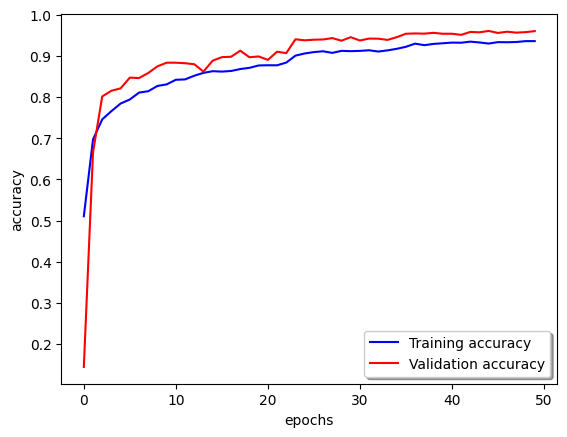

In [42]:
# Plot the classifier loss and accuracy curves for training and validation data
import matplotlib.pyplot as plt
plt.plot(historyc2.history['accuracy'], color='b', label="Training accuracy")
plt.plot(historyc2.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.ylabel('accuracy')
plt.xlabel('epochs')

In [43]:
#valid test data
import csv
import pandas as pd
testdataset=pd.read_csv('Dataset/SwipeDatatest.csv',index_col=0)
testdataset = testdataset[testdataset['Label'] < 68]
Xtest=testdataset.drop(columns=['Label'])
ytest=testdataset['Label']
ytest = to_categorical(ytest)

testdataset.head()
#Xtest.head()

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,Label
2595,0.042055,0.373291,0.462234,0.672240,0.460185,0.000000,0.000000,0.007363,0.181142,-0.057993,...,0.000146,0.017546,0.000308,0.176471,0.182163,0.180288,0.031583,0.000997,0.187470,21
3984,0.038581,0.480622,0.728615,0.953126,0.664928,0.034667,0.024510,0.003954,0.307242,-0.252209,...,-0.022077,0.034743,0.001207,1.000000,0.860215,0.943739,0.000000,0.000000,0.975610,33
6137,0.068385,0.357468,0.628147,0.658977,0.675978,0.045326,0.029412,0.004798,0.133935,-0.006750,...,-0.000243,0.009306,0.000087,1.000000,0.860215,0.943739,0.000000,0.000000,0.975610,51
6479,0.034741,0.249940,0.421155,0.462863,0.392526,0.000000,0.000000,0.030944,0.161029,-0.068421,...,0.002685,0.018482,0.000342,1.000000,0.860215,0.943739,0.000000,0.000000,0.975610,53
39,0.080271,0.253895,0.510652,0.724922,0.429636,0.000000,0.000000,0.009380,0.122974,-0.096867,...,0.000560,0.007207,0.000052,0.062745,0.168670,0.172760,0.097554,0.009515,0.175992,0


In [44]:
#Performance of the classifier for valid test data
Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = Classfier2.evaluate(Xtest, ytest)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

52/52 [==============================] - 1s 4ms/step - loss: 0.6762 - accuracy: 0.8170
Loss: 0.6761940121650696
Accuracy: 0.8169615864753723


In [45]:
#invalid test data
import csv
import pandas as pd
testdataset=pd.read_csv('Dataset/SwipeDatatest.csv',index_col=0)
testdataset = testdataset[testdataset['Label'] >= 68]
Xtest=testdataset.drop(columns=['Label'])
ytest = np.random.randint(0, 68, size=Xtest.shape[0])
ytest = pd.DataFrame(ytest, columns=['random_numbers'])
#ytest=testdataset['Label']
print(type(ytest))
ytest = to_categorical(ytest)

#testdataset.head()
#Xtest.head()

<class 'pandas.core.frame.DataFrame'>


In [31]:
#Performance of the classifier for valid test data
Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = Classfier2.evaluate(Xtest, ytest)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

14/14 [==============================] - 0s 2ms/step - loss: 14.3318 - accuracy: 0.0094
Loss: 14.331758499145508
Accuracy: 0.009411764331161976
